# TD 5 : Le réseau de Hopfield
---

Le modèle de Hopfield était pionnier pour décrire la capacité d'un réseau de neurone à rétenir des motifs en mémoire via ses connexions synaptiques, et des mécanismes de récupération de cette mémoire à partir d'un petit indice via une dynamique d'attracteur.


### La définition du modèle

Dans sa définition probabiliste, la dynamique du réseau est décrite par les équations suivantes :

 0. L'activité d'un neurone $i$ (parmi $N$ neurones en total) dans un interval de temps $[t, t+\Delta t]$ est décrit par une variable binaire $S_i(t)\in \{-1,1\}$. Si le neurone est actif dans cet interval, $S_i(t)=1$, sinon $S_i(t)=-1$.
 
 
 1. La matrice de connectivité étant donnée par $w_{ij}$, chaque neurone reçoit une entrée 
    $$h_i(t) = \sum_{j=1\ldots N} w_{ij}S_j(t)$$
    au temps $t$, qui dépend des poids synaptiques entre les neurones présynaptiques $j$ et le neurone postsynaptique $i$ ainsi que l'état des neurones présynaptiques à temps $t$.
    
    
 2. A chaque pas de temps, l'état de chaque neurone $S_i$, $i=1\ldots N$, est mis à jour en fonction de l'état de tous les neurones au temps précédent via les entrées qu'il reçoit. La probabilité que le neurone est actif est donnée par
    $${\rm prob}[S_i(t+\Delta t) = 1] = g(h_i(t)),$$
    où la fonction de gain $g$ est souvent choisie comme
    $$g(h_i) = \frac{1}{1+e^{-\beta h_i}}.$$
    (La probabilité que $S_i(t+\Delta t) = -1$ est donnée par $1-g(h_i)$.) Dans l'expression donnée pour $g$, $\beta$ joue le rôle d'une témperature inverse : dans la limite $\beta\to\infty$, la dynamique devient déterministe, et $S_i(t+\Delta t) = 1$ si $h_i(t)>0$, et $S_i(t+\Delta t) = -1$ si $h_i(t)>0$.


Le réseau de Hopfield peut stocker des *motifs* qui correspondent à l'activité spécifique d'un sous-ensemble de neurones ; on dit qu'un motif est réproduit par le réseau si l'*overlap* entre l'état du réseau et le motif est proche de 1. Les motifs étant définis comme 
$$ P_i^\mu \in \{-1,1\},\, i=1\ldots N,\,\mu=1\ldots K,$$
l'**overlap** $m^\nu(t)$ entre le motif $\nu$ et l'état du réseau à temps $t$ est donné par
$$ m^\nu(t) = \frac{1}{N}\sum_{i=1\ldots N} P^\nu_i S_i(t).$$


### La matrice de connectivité

Comment choisir la matrice de connectivité pour que le réseau évolue vers un motif "enregistré" ?

La solution proposée par Hopfield consiste à utiliser la connectivité suivante :

$$ w_{ij} = \frac{1}{N}\sum_{\mu=1\ldots K} P_i^\mu P_j^\mu .$$

(De manière générale, les connexions entre un neurone et lui-même, caracterisé par $w_{ii}$, ne sont pas admises, c'est-à-dire on enforce $w_{ii}=0$ après application de la connectivité ci-dessus.) 

Puisque les $P_i^\mu\in\{-1,1\}$, s'il n'y a qu'un seul motif ($K=1$), alors les poids prennnent également juste deux valeurs, $w_{ij}\in \{-1/N,1/N\}$. Par contre, si le nombre de motifs augmente ($K>1$), cela n'est plus vrai et les poids (toujours obéissant cette définition) peuvent prendre des valeurs différentes entre $[-K/N,K/N]$.

### Exercise 1 : Le rôle de l'overlap

1. Montrez qu'avec les définitions de $h_i$ et $w_{ij}$ ci-dessus, la dynamique peut être  exprimé en fonction des overlaps respectifs avec les différents motifs,
$${\rm prob}[S_i(t+\Delta t) = 1] = g(\sum_{\mu=1\ldots K} P_i^\mu m^\mu(t)).$$


2. S'il n'y a qu'un seul motif ($K=1$), comment est-ce que l'état d'un neurone $i$ évolue par rapport à sa valeur dans le motif $P_i$ pour :
    * un overlap positif, m>0 ?
    * un overlap zéro, m=0 ?
    * un overlap négatif, m<0 ?
    

3. Dans le cas avec plusieurs motifs ($K>1$), supposez qu'il y a un motif $\nu$ pour lequel l'overlap $m^\nu$ est positif et non-négligeable, pendant que les autres overlaps $m^\mu$, $\mu\neq\nu$, sont proches de 0. Comment pensez-vous vont évoluer les états $S_i$ des différents neurones par rapport au motif $\nu$ ? Pouvez-vous justifier votre intuition ?

**Réponses :**

1. Cela revient à montrer que $h_i(t) = \sum_{\mu} P_i^\mu m^\mu(t)$ :
$$\begin{align}
h_i(t) &= \sum_j w_{ij} S_j(t) \\
&= \sum_j \frac{1}{N} \sum_\mu P_i^\mu P_j^\mu S_j(t) \\
&= \sum_\mu P_i^\mu \left( \frac{1}{N} \sum_j P_j^\mu S_j(t) \right) \\
&= \sum_\mu P_i^\mu m^\mu(t)
\end{align}$$


2. Nous pouvons alors exprimer la probablité d'un neurone d'être actif ou inactif directement en fonction de $m(t)$ :
$$p = {\rm prob}[S_i(t+\Delta t) \text{ est actif}] = g(P_i m(t)).$$
    Pour $m=0$, $p=0.5$, et l'activité de chaque neurone est indépendamment du motif -1 ou 1 de manière aléatoire. Si $m>0$, les entrées $h_i(t) = P_i m(t)$ sont positives pour tous les $i$ avec $P_i=1$, et négatives pour les $i$ avec $P_i=-1$. Puisque $g(h_i)>0.5$ pour $h_i>0$, et $g(h_i)<0.5$ pour $h_i<0$, l'activité de chaque neurone est biaisé dans le sens du motif encodé dans la matrice de connectivité. Pour $m<0$, c'est l'inverse : chaque neurone $i$ aura tendence à prendre la valeur opposée à sa valeur $P_i$ dans le motif.
    

3. Si $K>1$, cette évolution vers le motif à partir d'un overlap positif n'est plus automatique, car le réseau peut avoir un overlap avec plusieurs motifs à la fois. Si on sépare l'overlap avec un motif donné (par ex. le premier) et les autres, on obtient :
$$h_i(t) = P_i^1 m^1(t) + \sum_{\mu=2\ldots K} P_i^\mu m^\mu(t),$$
où les $h_i$ sont biaisés vers les $P_i^1$ seulement si la somme sur tous les autres motifs s'annule à peu près pour chaque $i$. Les autres motifs commencent alors à interférer avec le stockage et la récupération d'un motif donné. 

## Hopfield en action !



### Exercise 2 : L'évolution du réseau dans le temps

1. Implémentez les mises à jour consécutives de l'état du réseau à partir de l'état initial ci-dessous, pour une valeur de $\beta=1$. Affichez, à chacune des 5 itérations, l'état du réseau comme image, et plottez à la fin l'overlap $m^0$ avec le motif en fonction du temps.

**Remarques :** La taille du réseau (le nombre de neurones) est donné par `N`, le motif est donnée par `P0`, et la matrice de connectivité (qui est determinée à partir de ce motif) est donnée par `W`. Enfin, l'état initial du réseau est donnée par `S[0]`, et choisi tel qu'il y a un overlap partiel entre cet état initial et le motif que nous souhaitons récupérer. 


**Astuces :** Ci-dessous, vous trouvez également des exemples comment (1) faire une multiplication de matrice de manière efficace utilisant les fonctionnalités de `numpy`, et (2) comment tirer un nombre aléatoire -1 ou 1 pour une probabilité $p$ pour 1 (et par conséquence probabilité 1-p pour -1).


2. Comment est-ce que la dynamique et l'état final changent si vous diminuez (augmentez) $\beta$ ? 


3. Quel est l'état final du réseau si vous commencez avec un overlap initial plus petit (par ex. limité au 100 premiers neurones) ? Si vous commencez avec un état complètement aléatoire ?

In [2]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

the shape of the image data is  (64, 64)


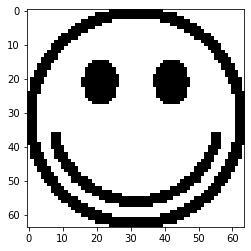

In [3]:
# import an image that we will use as first motif
img = np.loadtxt('smiley.dat')
print('the shape of the image data is ', img.shape)
plt.imshow(img, cmap='Greys_r')

In [4]:
# create our Hopfield net
# -----------------------

# convert the 2D pixel matrix to a 1D pattern vector
nx, ny = img.shape
P0 = img.flatten()

# the network size is given by the length of the pattern
N = len(P0)

# for a single pattern, the weight matrix is given by
W = P0[:,None] * P0[None,:] / N

# NOTE: This is a fancy way to create the matrix 
# W_ij = P_i * P_j / N. Alternatively, you could
# also create the matrix element-wise:
W2 = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        W2[i,j] = P0[i]*P0[j]/N

# (you can check that W2 = W at this point)

# enforce empty diagonal (no self-connections)
W[np.arange(N),np.arange(N)] = 0

# again, you can of course use a loop to do this
# explicitly:
for i in range(N):
    W2[i,i] = 0.
    
# (you can check again that W2 = W at this point)

In [5]:
# define some useful functions you can use below
# ----------------------------------------------

# gain function
def g(h, beta=1.):
    """Gain function: probability of a neuron to be 
    in the active state given the input h, for a 
    given value of beta (default value 1)."""
    return 1/(1+np.exp(-beta*h))


# overlap between a given pattern and a state
def overlap(state, pattern):
    return sum(state*pattern)/N


# a plot function to easily plot the 
# network state as an image
def plot_state(state):
    plt.imshow(state.reshape((nx,ny)), cmap='Greys_r')
    plt.pause(1)

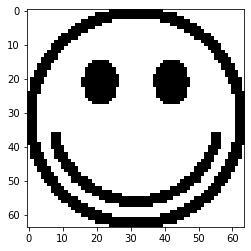

In [6]:
# afficher le motif nous avons encodé 
# dans la matrice de connectivité
plot_state(P0)

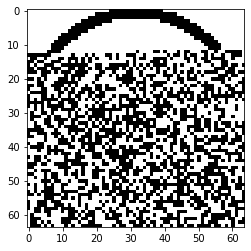

0.16650390625


In [11]:
# start from noisy pattern and iterate 
# over time

# number of time steps
nt = 5

# create state array for all times
S = np.ones((nt,N))

# noisy initial state
# NOTE: values must be either -1 or 1
S[0] = 2*np.round(np.random.uniform(size=N)) - 1

# add partial overlap to the initial state
S[0,:800] = P0[:800]

plot_state(S[0])
print(overlap(S[0],P0))

In [8]:
# Astuce 1 : produit d'une matrice avec un vecteur

# une matrice
A = np.array([[1,2],
              [2,3]])

# un vecteur
b = np.array([1,2])

# le produit y = A.b

# 1) avec des boucles for
y = np.zeros(2)
for i in range(2):
    for j in range(2):
        y[i] += A[i,j]*b[j]
print(y)

# 2) avec numpy
y = A.dot(b)
print(y)

[5. 8.]
[5 8]


In [9]:
# Astuce 2 : nombre aléatoire -1 ou 1 en fonction de 
# la probabilité p pour 1. pour cela, il faut

p = 0.5 # exemple

# (1) comparer une nombre aléatoire entre [0,1) à p
is_up = np.random.rand() < p

# (2) transformer le résultat (True ou False) en 1 ou -1s = 2*int(is_up) - 1
s = 2*is_up - 1

print('une seule valeur :')
print(is_up, s)

# cela marche aussi pour beaucoup de valeurs en parallèle
is_up = np.random.rand(10) < p 

s = 2*is_up - 1
print('un array de plusieurs valeurs à la fois :')
print(is_up, s)


une seule valeur :
False -1
un array de plusieurs valeurs à la fois :
[ True False False False  True False  True  True False False] [ 1 -1 -1 -1  1 -1  1  1 -1 -1]


**Solution :** La dynamique est **itérative**, il faut alors faire une boucle pour déterminer l'état suivant en fonction de l'état précédent. A chaque fois, la probabilité d'un neurone d'être actif ou pas dépend de ses entrées, qu'il faut alors calculer. Enfin, à partir de ces probabilités, on déterminera le nouvel état (de manière probabiliste).

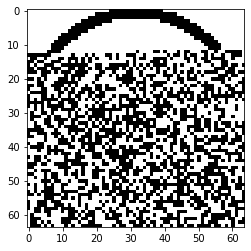

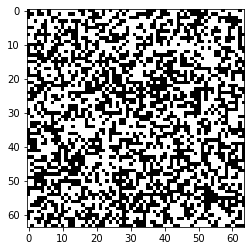

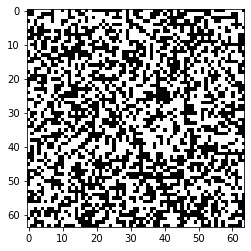

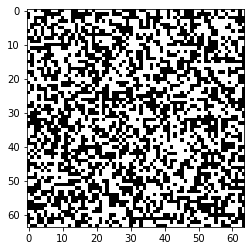

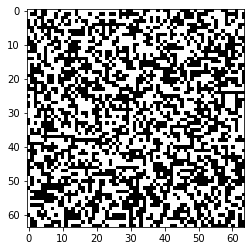

In [15]:
# plotter l'état intial
plot_state(S[0])

# boucle sur les différents temps
for i in range(nt-1):
    # calculer les entrées:
    # h_i = sum_j W_ij * S_j(t)
    # --> use "vector = matrix * vector"
    # to calculate all components at once
    h = W.dot(S[i])
    
    # calculer la probabilité d'être actif
    prob_actif = g(h,beta=1)
    
    # tirer nombres aleatoires pour savoir si actif ou pas
    actif = np.random.rand(N) < prob_actif
    
    # transformer en -1 ou 1
    S[i+1] = 2*actif - 1  
    
    plot_state(S[i+1])
    
    
    

Text(0, 0.5, 'overlap')

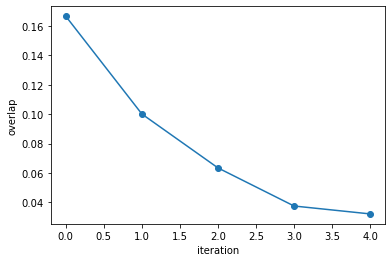

In [17]:
# calculer et plotter l'overlap

# array containing overlap values:
m = np.zeros(nt)

# loop over all times
for i in range(nt):
    m[i] = overlap(P0, S[i])
    
fig, ax = plt.subplots()
ax.plot(m, 'o-')
ax.set_xlabel('iteration')
ax.set_ylabel('overlap')

Le calcul de l'overlap confirme ce que nous avons pu constater en regardant les images : le motif n'est pas du tout récupéré, au contraire ! Alors qu'est-ce qui s'est passé ?! Il semble y avoir trop de bruit, à l'état suivant le côté probabiliste du modèle brouille le motif ! Rappel : Le calcul nous a montré que, dès qu'il y a un overlap positif dans le cas où il n'y a qu'un seul motif, tous les neurones sont biaisés dans le bon sens. Du coup, essayons de réduire le bruit, augmentons $\beta$ alors ! Regardez ce que ça donne :

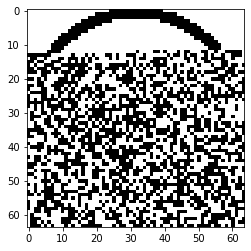

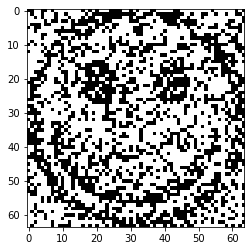

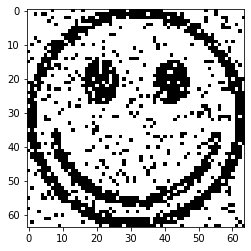

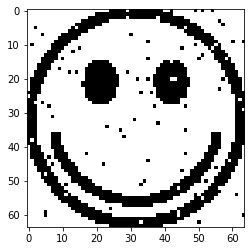

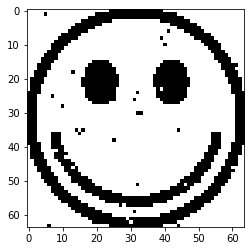

In [20]:
# maintenant avec beta = 5. !

plot_state(S[0])

# boucle sur les différents temps
for i in range(nt-1):
    # calculer les entrées:
    # h_i = sum_j W_ij * S_j(t)
    # --> use "vector = matrix * vector"
    # to calculate all components at once
    h = W.dot(S[i])
    
    # calculer la probabilité d'être actif
    prob_actif = g(h,beta=5)
    
    # tirer nombres aleatoires pour savoir si actif ou pas
    actif = np.random.rand(N) < prob_actif
    
    # transformer en -1 ou 1
    S[i+1] = 2*actif - 1  
    
    plot_state(S[i+1])

Ça marche ! Notez comment, grace aux bonnes valeurs pour les 800 premiers neurones (notre condition initiale), de plus en plus de neurones commencent à changer leur état dans celui réquis ! En revanche, le bruit non-négligable lié aux  valeurs arbitraires des autres neurones fait qu'avec la première itération, un certain nombre des neurones "bons" dans l'état initial change son état de manière aléatoire et semble ainsi corrompre la partie initialement propre de l'image.

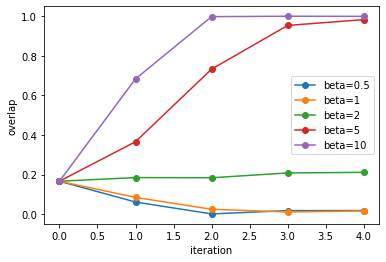

In [21]:
# Allons comparer l'évolution de l'overlap
# pour différentes valeurs de beta

betas = [0.5, 1., 2., 5., 10.]

# overlap pour chaque beta
m = np.zeros((len(betas),nt))

# overlap initial est égale pour chaque beta
m[:,0] = overlap(P0,S[0])

# boucle sur les différents beta
for ib, beta in enumerate(betas):
    
    # boucle sur les différents temps
    for i in range(nt-1):
        # calculer les entrées
        h = W.dot(S[i])
        # calculer la probabilité d'être actif
        prob_actif = g(h,beta=beta)
        # tirer nombres aleatoires pour savoir si actif ou pas
        actif = np.random.rand(N) < prob_actif
        # transformer en -1 ou 1
        S[i+1] = 2*actif - 1  
    
        m[ib,i+1] = overlap(P0,S[i+1])


# plot overlap pour différents beta
        
for ib, beta in enumerate(betas):
    plt.plot(m[ib], 'o-', label='beta=%g'%beta)

plt.xlabel('iteration')
plt.ylabel('overlap')
plt.legend()